In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [ ]:
train_data[0]

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


### Preparing the data

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [11]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 92ms/step - loss: 0.5389 - accuracy: 0.7761 - val_loss: 0.4126 - val_accuracy: 0.8572
Epoch 2/20
30/30 [==============================] - 3s 86ms/step - loss: 0.3398 - accuracy: 0.8898 - val_loss: 0.3237 - val_accuracy: 0.8794
Epoch 3/20
30/30 [==============================] - 2s 77ms/step - loss: 0.2560 - accuracy: 0.9157 - val_loss: 0.3093 - val_accuracy: 0.8749
Epoch 4/20
30/30 [==============================] - 2s 65ms/step - loss: 0.2056 - accuracy: 0.9301 - val_loss: 0.2955 - val_accuracy: 0.8812
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1741 - accuracy: 0.9419 - val_loss: 0.2777 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 2s 63ms/step - loss: 0.1500 - accuracy: 0.9509 - val_loss: 0.2827 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - loss: 0.1301 - accuracy: 0.9587 - val_loss: 0.2913 - val_accuracy: 0.8857
Epoch 8/20
30

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

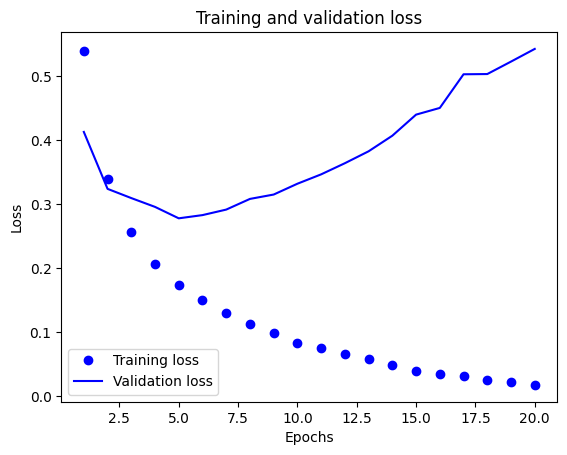

In [15]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

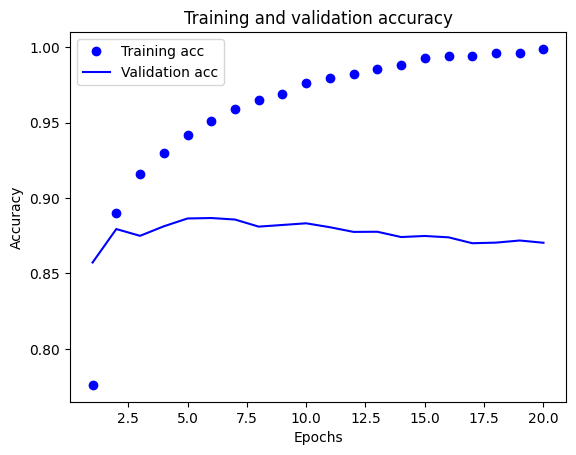

In [16]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 34ms/step - loss: 0.4415 - accuracy: 0.8222
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2606 - accuracy: 0.9054
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2065 - accuracy: 0.9248
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2976 - accuracy: 0.8810


In [18]:
results

[0.2976357936859131, 0.8809999823570251]

### Using a trained model to generate predictions on new data

In [19]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.20705025],
       [0.99972236],
       [0.92243826],
       ...,
       [0.11894033],
       [0.11072411],
       [0.7817268 ]], dtype=float32)

## Classifying newswires: A multiclass classification example

### The Reuters dataset

In [20]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [21]:
len(train_data)

8982

In [22]:
len(test_data)

2246

In [23]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [24]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [25]:
train_labels[10]

3

In [26]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [28]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

In [29]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [30]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [32]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 82ms/step - loss: 2.7321 - accuracy: 0.4902 - val_loss: 1.8483 - val_accuracy: 0.6150
Epoch 2/20
16/16 [==============================] - 1s 80ms/step - loss: 1.5583 - accuracy: 0.6699 - val_loss: 1.4066 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 1s 63ms/step - loss: 1.1831 - accuracy: 0.7462 - val_loss: 1.2138 - val_accuracy: 0.7330
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.9518 - accuracy: 0.8001 - val_loss: 1.0753 - val_accuracy: 0.7630
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.7841 - accuracy: 0.8296 - val_loss: 0.9977 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6513 - accuracy: 0.8586 - val_loss: 0.9564 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5408 - accuracy: 0.8869 - val_loss: 0.9100 - val_accuracy: 0.8060
Epoch 8/20
16

**Plotting the training and validation loss**

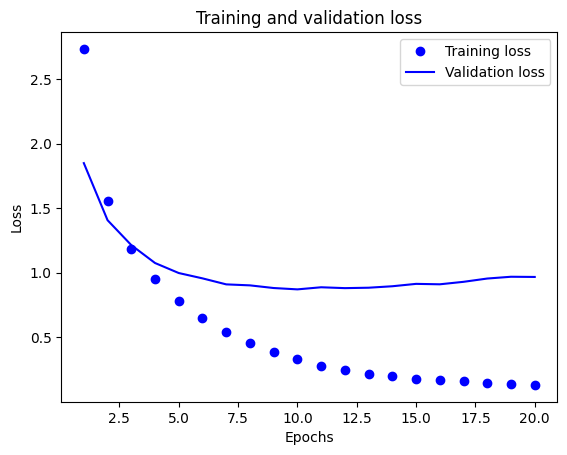

In [33]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

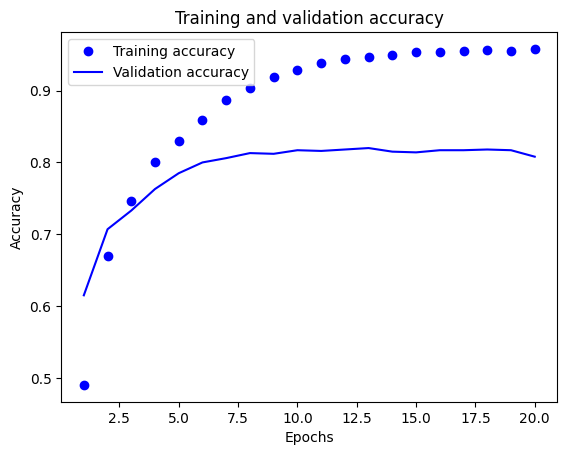

In [34]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [35]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 73ms/step - loss: 2.8104 - accuracy: 0.4874
Epoch 2/9
18/18 [==============================] - 1s 63ms/step - loss: 1.5099 - accuracy: 0.6945
Epoch 3/9
18/18 [==============================] - 1s 42ms/step - loss: 1.1323 - accuracy: 0.7563
Epoch 4/9
18/18 [==============================] - 1s 42ms/step - loss: 0.9218 - accuracy: 0.8048
Epoch 5/9
18/18 [==============================] - 1s 41ms/step - loss: 0.7661 - accuracy: 0.8372
Epoch 6/9
18/18 [==============================] - 1s 43ms/step - loss: 0.6344 - accuracy: 0.8632
Epoch 7/9
18/18 [==============================] - 1s 42ms/step - loss: 0.5362 - accuracy: 0.8849
Epoch 8/9
18/18 [==============================] - 1s 39ms/step - loss: 0.4569 - accuracy: 0.9040
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9424 - accuracy: 0.7898


In [36]:
results

[0.9423660635948181, 0.7898486256599426]

In [37]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18121104185218165

### Generating predictions on new data

In [38]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [39]:
predictions[0].shape

(46,)

In [40]:
np.sum(predictions[0])

1.0

In [41]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [42]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [43]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])